In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('sonar.csv',header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [4]:
df.shape

(208, 61)

In [5]:
df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [7]:
df[60].value_counts()

60
M    111
R     97
Name: count, dtype: int64

# Label Encoding + train test split

In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()

In [10]:
y_encoded = le.fit_transform(df.iloc[:,-1])

In [11]:
y = 1 - y_encoded

In [12]:
pd.Series(y).value_counts()

1    111
0     97
Name: count, dtype: int64

In [13]:
X = df.iloc[:,:-1]


In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,stratify = y,random_state = 42)

In [15]:
print(X_train.shape)
print(X_test.shape)

(166, 60)
(42, 60)


In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
scaler = StandardScaler()

In [18]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Logistic regression fitting

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(X_train,y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [21]:
X_train_pred = lr.predict(X_train)

In [22]:
print("Accuracy score on training data: ",accuracy_score(X_train_pred,y_train))

Accuracy score on training data:  0.8253012048192772


In [23]:
y_pred = lr.predict(X_test)

In [24]:
print("Accuracy score on test data: ",accuracy_score(y_pred,y_test))

Accuracy score on test data:  0.8095238095238095


In [25]:
from sklearn.metrics import confusion_matrix

In [31]:
confusion_matrix(y_test,y_pred)

array([[15,  5],
       [ 3, 19]], dtype=int64)

In [27]:
from sklearn.model_selection import GridSearchCV

In [28]:
param_grid = {
    'penalty' : ['l1','l2'],
    'C' : [0.01, 0.1, 1.0, 10, 100],
    'solver' : ['liblinear','saga'],
    

}

In [29]:
grid = GridSearchCV(
    estimator = lr,
    param_grid = param_grid,
    cv = 10,
    scoring = 'f1'
)

In [30]:
grid.fit(X_train_scaled,y_train)

C:\Users\parth\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\parth\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\parth\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\parth\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\parth\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\parth\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter 

,estimator,LogisticRegression()
,param_grid,"{'C': [0.01, 0.1, ...], 'penalty': ['l1', 'l2'], 'solver': ['liblinear', 'saga']}"
,scoring,'f1'
,n_jobs,None
,refit,True
,cv,10
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,penalty,'l2'


In [32]:
grid.best_params_

{'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}

In [33]:
best_model = grid.best_estimator_

In [34]:
y1_pred = best_model.predict(X_test_scaled)

In [35]:
from sklearn.metrics import recall_score

In [36]:
print(accuracy_score(y1_pred,y_test))
print(confusion_matrix(y1_pred,y_test))
print(recall_score(y1_pred,y_test,pos_label = 1))

0.8095238095238095
[[16  4]
 [ 4 18]]
0.8181818181818182


In [37]:
coeff = best_model.coef_[0]

In [38]:
importance = np.abs(coeff)

In [39]:
top_indices = np.argsort(importance)[-10:]

In [40]:
top_features = importance[top_indices]
feature_names = [f'Feature {i}' for i in top_indices]


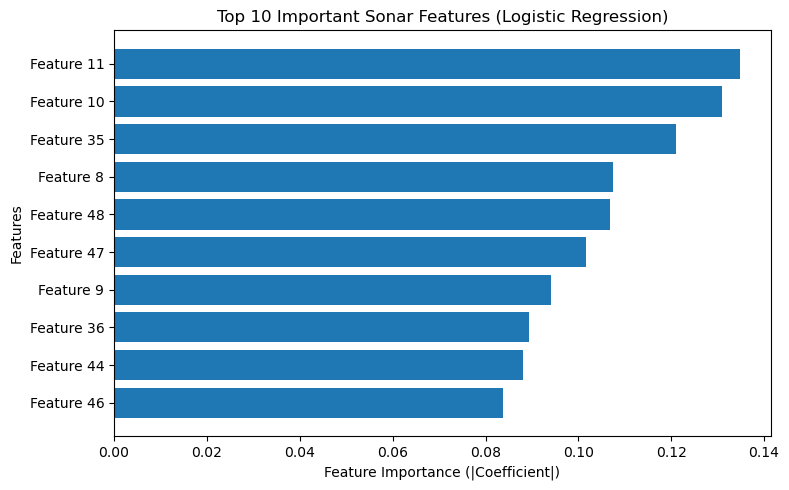

In [41]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.barh(feature_names, top_features)
plt.xlabel("Feature Importance (|Coefficient|)")
plt.ylabel("Features")
plt.title("Top 10 Important Sonar Features (Logistic Regression)")
plt.tight_layout()
plt.show()


In [42]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [43]:
svc = SVC()

In [44]:
svc.fit(X_train,y_train)

,C,1.0
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [45]:
svc_pred = svc.predict(X_test)

In [46]:
print(accuracy_score(svc_pred,y_test))
print(recall_score(svc_pred,y_test))

0.8333333333333334
0.7777777777777778


In [47]:
knn = KNeighborsClassifier()

In [48]:
knn.fit(X_train,y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'minkowski'
,metric_params,None
,n_jobs,None


In [49]:
knn_pred = knn.predict(X_test)

In [50]:
print(accuracy_score(knn_pred,y_test))
print(recall_score(knn_pred,y_test))

0.8333333333333334
0.8260869565217391


In [51]:
import pickle

# save trained model
with open("sonar_model.pkl", "wb") as f:
    pickle.dump(best_model, f)

# save scaler
with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)
